# Climate DT historical runs: ECmean4 within the AQUA framework 

We need to load the AQUA module to access the Reader and the ECmean `performance_indices` function. 
Configuration files (which tells ECmean4 where output should be written and the mask are) as well as interface file (which defines the Climate DT filename communication between AQUA and ECmean4) should be loaded.

We will run the ECmean code on both IFS-NEMO and ICON `historical-1990` experiment, for which we can get a serious assessment of the model skill. It will run on a reduced time window (5-year) to keep computation time slow. 

In [1]:
from aqua import Reader
from ecmean.performance_indices import performance_indices
from aqua.util import ConfigPath
import sys
machine = ConfigPath().get_machine()

models = ['IFS-NEMO', 'ICON']
machine = machine
exp = 'historical-1990'
year1 = 1996
year2 = 2000
numproc = 1
interface = '../config/interface_AQUA_destine-v1.yml'
config = f'../config/ecmean_config_destine-v1-{machine}.yml'
datadir = {'lumi': '/pfs/lustrep3/projappl/project_465000454/padavini/ecmean_new/output/PDF', 'levante': './'}

*Important*: before proceeding please edit the output directories in `config/config.yaml`, especially if you move from Lumi/Levante to another machine. As a temporary solution, we are providing two configuration files for both machines. On the long term, we will try to remove the machine dependency on the code (which is related to the fact of ECmean being an external package from AQUA)

Now you can load the data from the LRA, looping on the two models and running the performance indices. The operation should take about less than 1 minute. Parallel processing can be used (not with dask rather with multiproc)

In [2]:
for model in models: 
    reader = Reader(model=model, exp=exp, source="lra-r100-monthly", fix=False)
    data = reader.retrieve()
    performance_indices(exp, year1, year2, numproc = numproc, config = config, model = model, 
            interface = interface, loglevel = 'info', xdataset = data)

2024-05-17 21:29:06 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi


2024-05-17 21:29:15 | ecmean |     INFO -> Running on Linux and multiprocessing method set as "fork"
2024-05-17 21:29:15 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...
2024-05-17 21:29:15 | ecmean.libs.files |     INFO -> maskfile for component atm is: ../data/atm_mask_r100.nc
2024-05-17 21:29:15 | ecmean.libs.files |     INFO -> areafile for component atm is: ../data/cell_area_r100.nc
2024-05-17 21:29:15 | ecmean.libs.files |     INFO -> maskfile for component oce is: ../data/oce_mask_r100.nc
2024-05-17 21:29:15 | ecmean.libs.files |     INFO -> areafile for component oce is: ../data/cell_area_r100.nc
2024-05-17 21:29:15 | ecmean.libs.support |     INFO -> atmmareafile is ../data/cell_area_r100.nc
2024-05-17 21:29:15 | ecmean.libs.support |     INFO -> Atmosphere grid is is a lonlat grid!


Welcome to ECmean4 v0.1.8: Running performance_indices with 1 cores!


2024-05-17 21:29:16 | ecmean.libs.support |     INFO -> maskatmfile is ../data/atm_mask_r100.nc
2024-05-17 21:29:17 | ecmean.libs.support |     INFO -> ocemareafile is ../data/cell_area_r100.nc
2024-05-17 21:29:17 | ecmean.libs.support |     INFO -> Oceanic grid is is a lonlat grid!
2024-05-17 21:29:18 | ecmean.libs.support |     INFO -> maskocefile is ../data/oce_mask_r100.nc
2024-05-17 21:29:18 | ecmean.libs.support |     INFO -> sftof is being flipped
2024-05-17 21:29:18 | ecmean |     INFO -> Preproc in 2.8946 seconds
2024-05-17 21:29:37 | ecmean |     INFO -> Done in 18.9684 seconds with 1 processors
2024-05-17 21:29:38 | ecmean |     INFO -> Postproc done in 1.2888 seconds
2024-05-17 21:29:38 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi


ECmean4 Performance Indices succesfully computed!


2024-05-17 21:29:50 | ecmean |     INFO -> Updating the log_level to INFO
2024-05-17 21:29:50 | ecmean |     INFO -> Running on Linux and multiprocessing method set as "fork"
2024-05-17 21:29:50 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...
2024-05-17 21:29:50 | ecmean.libs.files |     INFO -> maskfile for component atm is: ../data/atm_mask_r100.nc
2024-05-17 21:29:50 | ecmean.libs.files |     INFO -> areafile for component atm is: ../data/cell_area_r100.nc
2024-05-17 21:29:50 | ecmean.libs.files |     INFO -> maskfile for component oce is: ../data/oce_mask_r100.nc
2024-05-17 21:29:50 | ecmean.libs.files |     INFO -> areafile for component oce is: ../data/cell_area_r100.nc
2024-05-17 21:29:50 | ecmean.libs.support |     INFO -> atmmareafile is ../data/cell_area_r100.nc
2024-05-17 21:29:50 | ecmean.libs.support |     INFO -> Atmosphere grid is is a lonlat grid!


Welcome to ECmean4 v0.1.8: Running performance_indices with 1 cores!


2024-05-17 21:29:51 | ecmean.libs.support |     INFO -> maskatmfile is ../data/atm_mask_r100.nc
2024-05-17 21:29:51 | ecmean.libs.support |     INFO -> ocemareafile is ../data/cell_area_r100.nc
2024-05-17 21:29:51 | ecmean.libs.support |     INFO -> Oceanic grid is is a lonlat grid!
2024-05-17 21:29:52 | ecmean.libs.support |     INFO -> maskocefile is ../data/oce_mask_r100.nc
2024-05-17 21:29:52 | ecmean.libs.support |     INFO -> sftof is being flipped
2024-05-17 21:29:52 | ecmean |     INFO -> Preproc in 2.2116 seconds
2024-05-17 21:30:07 | ecmean.libs.files |  WARNING -> Variable net_sfc requires msr which is not available in the model output. Ignoring it.
2024-05-17 21:30:11 | ecmean |     INFO -> Done in 18.2422 seconds with 1 processors
2024-05-17 21:30:11 | ecmean |     INFO -> Postproc done in 0.7816 seconds


ECmean4 Performance Indices succesfully computed!


Plots are PDF and ca be visualized browsing to the proper location where are they are been stored according to the configuration file
- [ICON](/users/padavini/work/ecmean_new/output/PDF/PI4_EC23_historical-1990_ICON_r1i1p1f1_1996_2000.pdf)
- [IFS-NEMO](/users/padavini/work/ecmean_new/output/PDF/PI4_EC23_historical-1990_IFS-NEMO_r1i1p1f1_1996_2000.pdf)

Otherwise, to visualize the output within the notebook we need to use an extra package, which is Wand. Remember to install it through `mamba install imagemagick` and `pip install wand` if you want to visualize the output.

In [3]:
from wand.image import Image as WImage
img_icon = WImage(filename=f'{datadir[machine]}/PI4_EC23_{exp}_ICON_r1i1p1f1_{year1}_{year2}.pdf')
img_ifs = WImage(filename=f'{datadir[machine]}/PI4_EC23_{exp}_IFS-NEMO_r1i1p1f1_{year1}_{year2}.pdf')

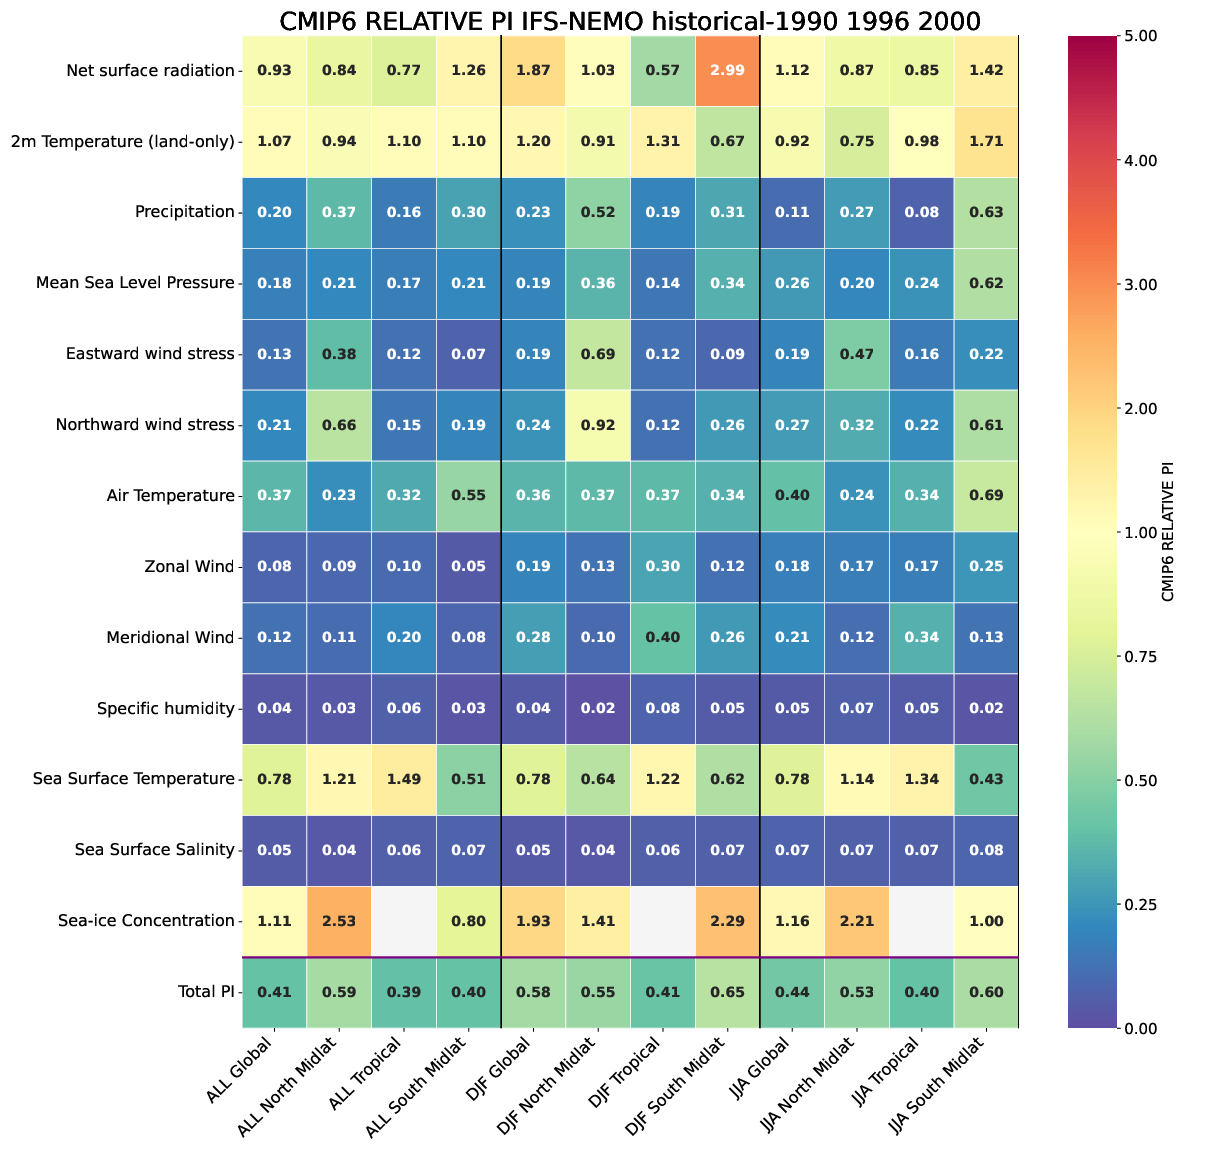

In [5]:
img_ifs

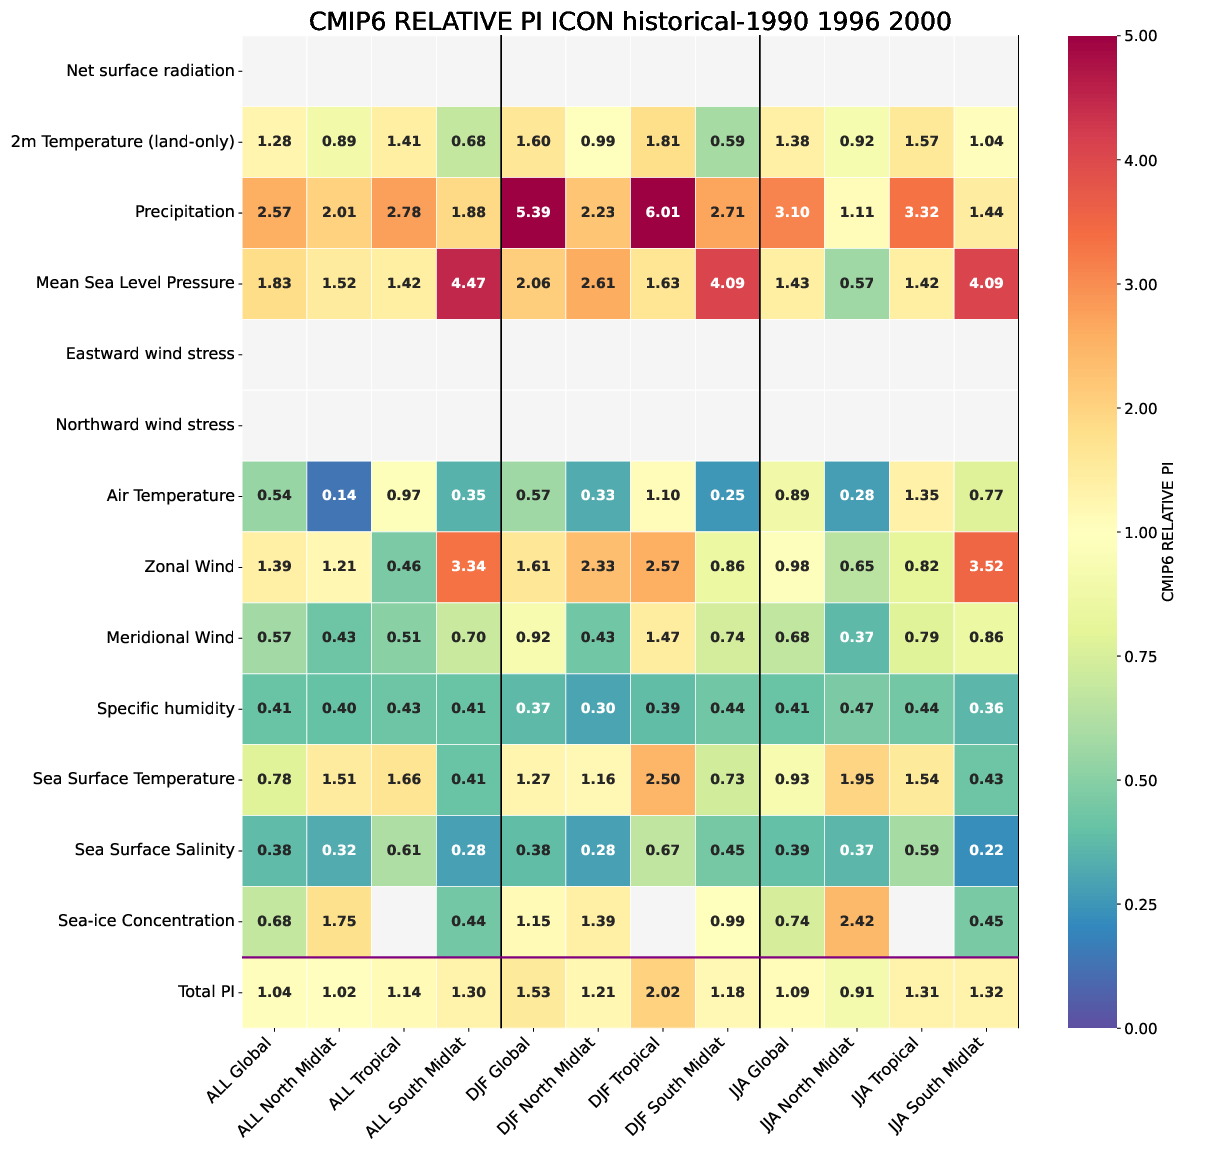

In [6]:
img_icon